### Introduction

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case was identified in Wuhan, China, in December 2019. It has since spread worldwide, leading to an ongoing pandemic. https://en.wikipedia.org/wiki/Coronavirus_disease_2019

#### Problem Definition

The following Exploratory data analysis is to determine Africa's Progress in line with administaring vaccines to protect her citizens against the Corona Virus

#### Data Sources
The data for this analysis was sourced from kaggle https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
vaccine = pd.read_csv('country_vaccinations.csv')
vaccine.head(5)

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Algeria      DZA  2021-01-29                 0.0                NaN   
1  Algeria      DZA  2021-01-30                30.0                NaN   
2  Andorra      AND  2021-01-25               576.0              576.0   
3  Andorra      AND  2021-01-26                 NaN                NaN   
4  Andorra      AND  2021-01-27                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                    30.0                30.0   
2                      NaN                     NaN                 NaN   
3                      NaN                     NaN                66.0   
4                      NaN                     NaN                66.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                            NaN   
1                            0.00                            NaN   
2                            0.75                           0.75   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                             1.0   
2                                  NaN                             NaN   
3                                  NaN                           854.0   
4                                  NaN                           854.0   

          vaccines            source_name  \
0        Sputnik V     Ministry of Health   
1        Sputnik V     Ministry of Health   
2  Pfizer/BioNTech  Government of Andorra   
3  Pfizer/BioNTech  Government of Andorra   
4  Pfizer/BioNTech  Government of Andorra   

                                      source_website  
0  https://www.aps.dz/regions/116777-blida-covid-...  
1  https://www.aps.dz/regions/116777-blida-covid-...  
2  https://www.govern.ad/comunicats/item/12379-se...  
3  https://www.govern.ad/comunicats/item/12379-se...  
4  https://www.govern.ad/comunicats/item/12379-se...

In [3]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 15 columns):
country                                2418 non-null object
iso_code                               2189 non-null object
date                                   2418 non-null object
total_vaccinations                     1575 non-null float64
people_vaccinated                      1303 non-null float64
people_fully_vaccinated                756 non-null float64
daily_vaccinations_raw                 1288 non-null float64
daily_vaccinations                     2321 non-null float64
total_vaccinations_per_hundred         1575 non-null float64
people_vaccinated_per_hundred          1303 non-null float64
people_fully_vaccinated_per_hundred    756 non-null float64
daily_vaccinations_per_million         2321 non-null float64
vaccines                               2418 non-null object
source_name                            2418 non-null object
source_website                         2418 no

In [4]:
vaccine['country'].unique()

array(['Algeria', 'Andorra', 'Argentina', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Canada', 'Cayman Islands', 'Chile', 'China',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador',
       'Egypt', 'England', 'Estonia', 'Faeroe Islands', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guernsey', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
       'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman', 'Panama',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Saint Helena',
       'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Turkey', 'Uni

#### Data Preprocessing

In [5]:
vaccine.isnull().sum()

country                                   0
iso_code                                229
date                                      0
total_vaccinations                      843
people_vaccinated                      1115
people_fully_vaccinated                1662
daily_vaccinations_raw                 1130
daily_vaccinations                       97
total_vaccinations_per_hundred          843
people_vaccinated_per_hundred          1115
people_fully_vaccinated_per_hundred    1662
daily_vaccinations_per_million           97
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [6]:
vaccine.fillna(0, inplace = True)
vaccine.drop(['source_website', 'source_name'], axis = 1, inplace = True)
vaccine.tail(5)

country iso_code        date  total_vaccinations  people_vaccinated  \
2413   Wales        0  2021-02-01            440706.0           439640.0   
2414   Wales        0  2021-02-02            463657.0           462497.0   
2415   Wales        0  2021-02-03            491786.0           490570.0   
2416   Wales        0  2021-02-04            524677.0           523042.0   
2417   Wales        0  2021-02-05            559468.0           556997.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
2413                   1066.0                 23559.0             21508.0   
2414                   1160.0                 22951.0             21530.0   
2415                   1216.0                 28129.0             22149.0   
2416                   1635.0                 32891.0             23101.0   
2417                   2471.0                 34791.0             25788.0   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
2413                           13.98                          13.94   
2414                           14.71                          14.67   
2415                           15.60                          15.56   
2416                           16.64                          16.59   
2417                           17.74                          17.67   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
2413                                 0.03                          6822.0   
2414                                 0.04                          6829.0   
2415                                 0.04                          7025.0   
2416                                 0.05                          7327.0   
2417                                 0.08                          8179.0   

                                 vaccines  
2413  Oxford/AstraZeneca, Pfizer/BioNTech  
2414  Oxford/AstraZeneca, Pfizer/BioNTech  
2415  Oxford/AstraZeneca, Pfizer/BioNTech  
2416  Oxford/AstraZeneca, Pfizer/BioNTech  
2417  Oxford/AstraZeneca, Pfizer/BioNTech

In [7]:
#Create function that returns a list of countries with empty iso_code lists.
def no_values(data):
    #Creating an empty list to check for countries with null iso_code value.
    zero_codes = []
    for country, iso_code in data[['country', 'iso_code']].itertuples(index=False):
        if iso_code == 0:
            zero_codes.append(country)
    return zero_codes
#Return Unique results of countries with Null iso_code
null_values = no_values(vaccine)
null_values = pd.DataFrame(null_values, columns = ['Missing'])
null_values['Missing'].unique()

array(['England', 'Northern Cyprus', 'Northern Ireland', 'Scotland',
       'Wales'], dtype=object)

The following countries have missing Iso_code

In [8]:
vaccine['iso_code'].replace(0, 'GBR', inplace = True)

In [9]:
data = dict( type = 'choropleth',
            locations = vaccine['iso_code'],
            z = vaccine['people_vaccinated'],
            text = vaccine['country'],
            colorbar = {'title': 'Total covid19 vaccination'}
)

layout = dict(title = 'World vaccine progress',
             geo = dict(showframe = False, projection = {'type': 'natural earth'}))

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data= data, layout= layout )

fig.show(renderer = 'svg', width = 990, height = 700)

The above Image represents various countries and the total number vaccine doses which been administered

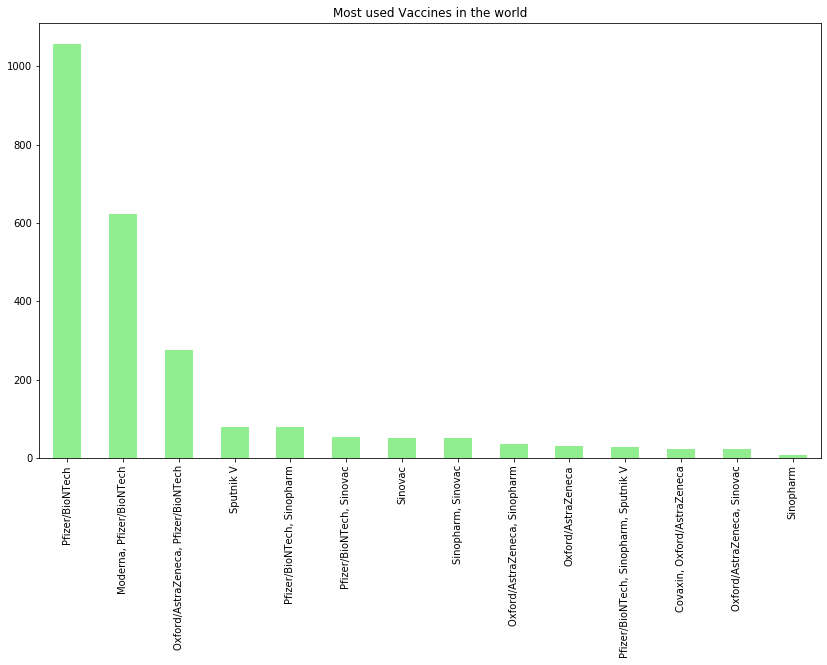

In [11]:
type_vaccine = vaccine['vaccines'].value_counts()
type_vaccine.plot(kind = 'bar', figsize = (14, 8), color = 'lightgreen')
plt.title('Most used Vaccines in the world');

The Graph above represent's the most Used Vaccines in the world.
* The Pfizer vaccine is the most used vaccine in the world

In [12]:
#Filterimg data for Africa Only.
Africa = ['Algeria', 'Egypt']
vaccine['country'].isin(Africa)
africa = vaccine[vaccine['country'].isin(Africa)]
africa

country iso_code        date  total_vaccinations  people_vaccinated  \
0    Algeria      DZA  2021-01-29                 0.0                0.0   
1    Algeria      DZA  2021-01-30                30.0                0.0   
650    Egypt      EGY  2021-01-24                 0.0                0.0   
651    Egypt      EGY  2021-01-25                 0.0                0.0   
652    Egypt      EGY  2021-01-26                 0.0                0.0   
653    Egypt      EGY  2021-01-27                 0.0                0.0   
654    Egypt      EGY  2021-01-28                 0.0                0.0   
655    Egypt      EGY  2021-01-29                 0.0                0.0   
656    Egypt      EGY  2021-01-30              1315.0                0.0   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                        0.0                     0.0                 0.0   
1                        0.0                    30.0                30.0   
650                      0.0                     0.0                 0.0   
651                      0.0                     0.0               219.0   
652                      0.0                     0.0               219.0   
653                      0.0                     0.0               219.0   
654                      0.0                     0.0               219.0   
655                      0.0                     0.0               219.0   
656                      0.0                     0.0               219.0   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                               0.0                            0.0   
1                               0.0                            0.0   
650                             0.0                            0.0   
651                             0.0                            0.0   
652                             0.0                            0.0   
653                             0.0                            0.0   
654                             0.0                            0.0   
655                             0.0                            0.0   
656                             0.0                            0.0   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                    0.0                             0.0   
1                                    0.0                             1.0   
650                                  0.0                             0.0   
651                                  0.0                             2.0   
652                                  0.0                             2.0   
653                                  0.0                             2.0   
654                                  0.0                             2.0   
655                                  0.0                             2.0   
656                                  0.0                             2.0   

      vaccines  
0    Sputnik V  
1    Sputnik V  
650  Sinopharm  
651  Sinopharm  
652  Sinopharm  
653  Sinopharm  
654  Sinopharm  
655  Sinopharm  
656  Sinopharm

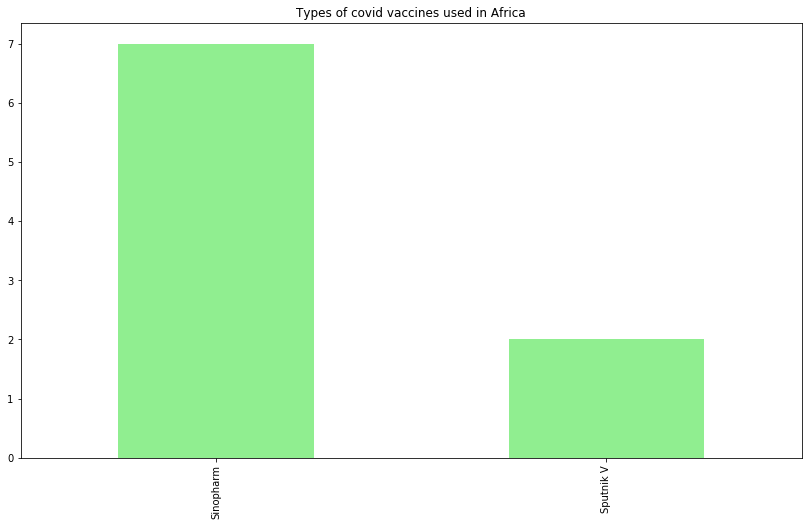

In [13]:
africa_vaccine = africa['vaccines'].value_counts()
africa_vaccine.plot(kind = 'bar', figsize = (14, 8), color = 'lightgreen')
plt.title('Types of covid vaccines used in Africa');

The Table Illustrate's the type of COVID 19 Vaccines used in Africa which are 
* Sinopharm
* Sputnik V

In [14]:
africa = africa[africa['total_vaccinations'] > 0]
africa

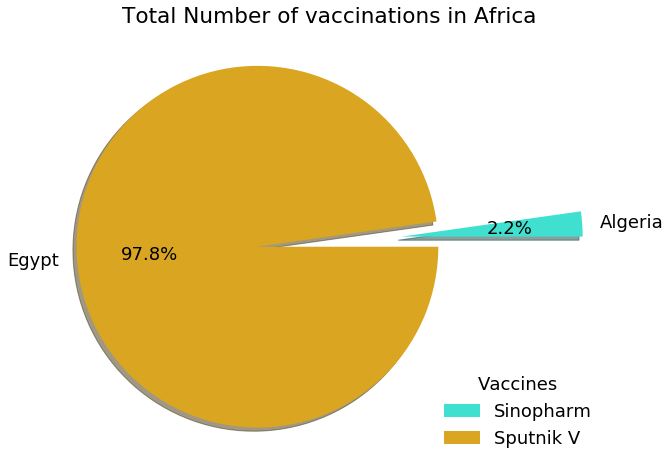

In [81]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

#Creating Labels
labels = ['Algeria', 'Egypt']

# creating Explode matrix
explode = (0.2, 0.6)

#Creating colour options
colors = ['turquoise', 'goldenrod']

fig, ax = plt.subplots(figsize = (10, 8))
ax.pie(africa['total_vaccinations'], explode = explode,labels = labels , colors = colors, shadow = True,autopct = '%1.1f%%');
ax.axis('equal');

ax.set(title = 'Total Number of vaccinations in Africa');
labels = [ labels[1], labels[0]]
ax.legend(africa['vaccines'].value_counts().index, loc='lower right', frameon=False, title = 'Vaccines')
plt.show()

 ## Conclusion
 * Only 2 countries in africa have had their citizens vaccinated.
 * Egypt Currently lead the vaccination process by over 90%
 